In [7]:
import os
import sys

# allow importing from parent directory
current_folder = globals()['_dh'][0]
data_location = os.path.join(current_folder,'data.csv')
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(data_location), '..')))

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display

from ultralytics import settings
settings.update({"sync": False, "runs_dir": "interim_results", "datasets_dir": "datasets"})
from ultralytics import YOLOEdgeUncertainty, YOLO
import cv2
import re
import datetime

FONT_SMALL = 16
FONT_MEDIUM = 18
FONT_LARGE = 20

plt.rcParams['font.size'] = FONT_LARGE
plt.rcParams['axes.labelsize'] = FONT_MEDIUM
plt.rcParams['xtick.labelsize'] = FONT_SMALL
plt.rcParams['ytick.labelsize'] = FONT_SMALL
plt.rcParams['legend.fontsize'] = FONT_SMALL
plt.rcParams['figure.titlesize'] = FONT_MEDIUM
plt.rcParams['axes.titlesize'] = FONT_MEDIUM
plt.rcParams['figure.figsize'] = (16, 7)

In [8]:
path_base = '../interim_results/detect'

all_folders = [f for f in os.listdir(path_base) if re.match(r'\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2}', f)]
newest_results = sorted(all_folders)[-1]
print(f'Newest results folder: {newest_results}')

print(f'Newest results: {newest_results}')  
train_path = f'{path_base}/{newest_results}/train'

df_results_train = pd.DataFrame()
for model_folder in [f for f in os.listdir(train_path) if os.path.isdir(f'{train_path}/{f}')]:
    df_results_model = pd.read_csv(f'{train_path}/{model_folder}/results.csv')
    if df_results_train.empty:
        df_results_train = df_results_model
    else:
        df_results_train = pd.concat([df_results_train, df_results_model])

df_results_val = pd.DataFrame()
val_path = f'{path_base}/{newest_results}/val'
for model_folder in [f for f in os.listdir(val_path) if os.path.isdir(f'{val_path}/{f}')]:
    df_results_model = pd.read_csv(f'{val_path}/{model_folder}/results.csv')
    if df_results_val.empty:
        df_results_val = df_results_model
    else:
        df_results_val = pd.concat([df_results_val, df_results_model])

df_results_train.set_index('name', inplace=True)
df_results_train = df_results_train.sort_index()
df_results_val.set_index('name', inplace=True)
df_results_val = df_results_val.sort_index()

# minmax scaling of all speed cols
speed_cols = [col for col in df_results_train.columns if 'speed' in col]
df_results_train['speed_total'] = df_results_train[speed_cols].sum(axis=1)
df_results_val['speed_total'] = df_results_val[speed_cols].sum(axis=1)

display(df_results_train)
display(df_results_val)

Newest results folder: 2025-07-09_15-22-40_models-6_epochs-50
Newest results: 2025-07-09_15-22-40_models-6_epochs-50


,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),metrics/mUE50,metrics/mUE50_thres,metrics/mUE50-95,metrics/mUE50-95_thres,metrics/mUE50_correct,metrics/mUE50_incorrect,...,metrics/max_mAP50_unc,metrics/max_mAP50_unc_thres,metrics/max_mAP50-95_unc,metrics/max_mAP50-95_unc_thres,fitness,speed_preprocess,speed_inference,speed_loss,speed_postprocess,speed_total
name,,,,,,,,,,,,,,,,,,,,,
base-confidence,0.433555,0.287885,0.271441,0.152510,0.198445,0.84,0.122965,0.705,0.119381,0.079064,...,0.342562,0.07,0.309753,0.07,0.164403,0.013322,0.153010,0.000172,2.776622,2.943126
base-uncertainty,0.433555,0.287885,0.271441,0.152510,0.229445,2.99,0.133209,2.986,0.202680,0.026765,...,0.343789,2.91,0.300728,2.91,0.164403,0.014487,0.161291,0.000165,2.517093,2.693036
dfl-uncertainty,0.433629,0.287950,0.271455,0.152141,0.063389,0.01,0.049500,0.010,0.063389,0.000000,...,0.054907,1.13,0.027979,1.13,0.164072,0.013191,0.156702,0.000160,2.594524,2.764577
edl-meh,0.421850,0.272596,0.255140,0.143126,0.197409,2.26,0.128054,1.596,0.111390,0.086019,...,0.260934,2.77,0.154102,1.71,0.154328,0.013830,0.226874,0.000174,2.343319,2.584197
ensemble,0.441655,0.279982,0.276592,0.153444,0.494722,0.01,0.489348,0.596,0.490748,0.003974,...,0.270513,2.24,0.150505,2.24,0.165758,0.013381,2.097400,0.000180,0.644134,2.755096
mc-dropout,0.379377,0.270889,0.237669,0.136174,0.484247,0.01,0.472922,0.159,0.480817,0.003430,...,0.197588,1.66,0.109746,1.66,0.146324,0.014988,2.372080,0.000205,0.626760,3.014034


,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),metrics/mUE50,metrics/mUE50_thres,metrics/mUE50-95,metrics/mUE50-95_thres,metrics/mUE50_correct,metrics/mUE50_incorrect,...,metrics/max_mAP50_unc,metrics/max_mAP50_unc_thres,metrics/max_mAP50-95_unc,metrics/max_mAP50-95_unc_thres,fitness,speed_preprocess,speed_inference,speed_loss,speed_postprocess,speed_total
name,,,,,,,,,,,,,,,,,,,,,
base-confidence,0.396460,0.223495,0.207003,0.119470,0.224146,0.87,0.138149,0.747,0.145833,0.078312,...,0.357297,0.15,0.316877,0.10,0.128223,0.023562,0.720630,0.000362,0.551745,1.296299
base-uncertainty,0.396460,0.223495,0.207003,0.119470,0.255974,2.99,0.151423,2.987,0.233861,0.022113,...,0.355676,2.92,0.311937,2.90,0.128223,0.016682,0.704701,0.000349,0.526905,1.248638
dfl-uncertainty,0.396460,0.223495,0.207003,0.119470,0.376040,0.71,0.340671,0.688,0.099938,0.276102,...,0.207751,1.11,0.119895,1.05,0.128223,0.016214,0.772414,0.000341,0.528523,1.317492
edl-meh,0.380992,0.224053,0.201397,0.112340,0.249677,1.08,0.170902,0.534,0.125393,0.124284,...,0.206624,2.10,0.117207,1.78,0.121246,0.019217,0.767544,0.001009,0.546284,1.334054
ensemble,0.427989,0.212988,0.204570,0.114787,0.500000,3.28,0.496625,1.928,0.000000,0.500000,...,0.204570,3.28,0.114787,3.28,0.123765,0.028535,0.965295,0.000335,0.472554,1.466719
mc-dropout,0.358268,0.210897,0.195514,0.112516,0.500000,2.66,0.487643,1.356,0.000000,0.500000,...,0.195514,2.66,0.112517,2.06,0.120815,0.019281,1.103810,0.000333,0.483639,1.607062


Text(0.5, 1.0, 'mean Average Precision (mAP): cityscapes (train), foggy-cityscapes (val)')

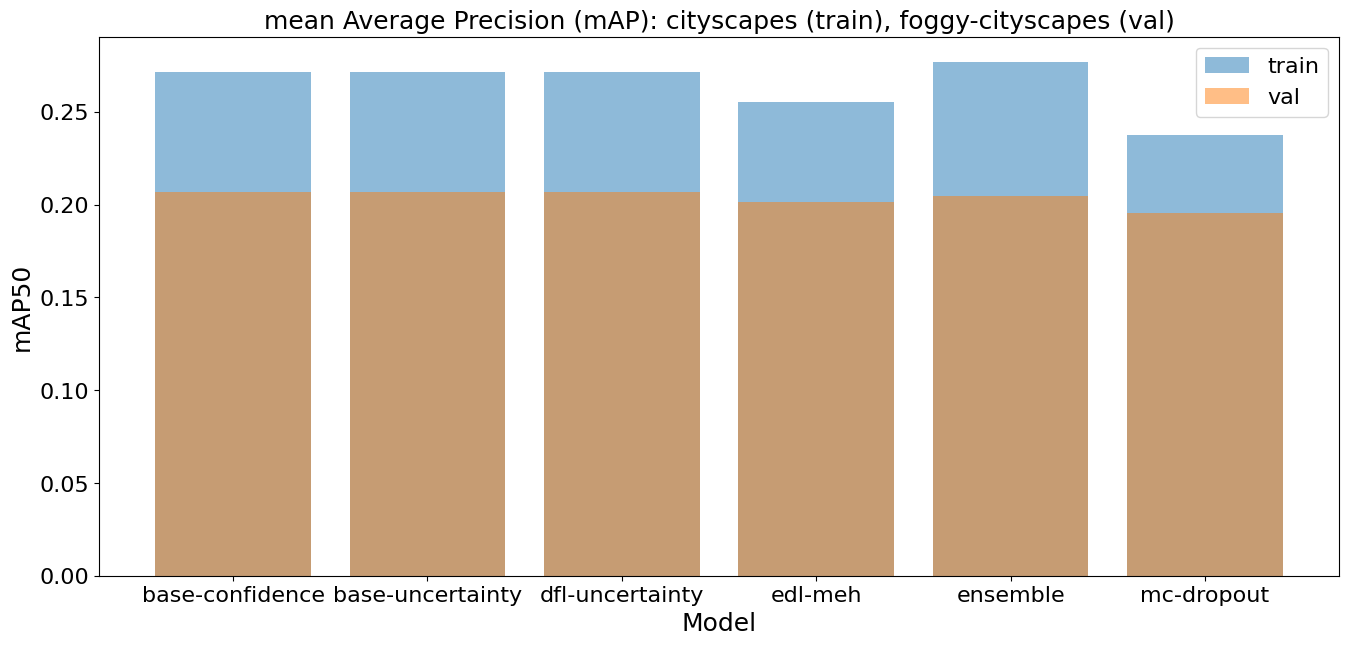

In [9]:
plt.bar(df_results_train.index, df_results_train['metrics/mAP50(B)'], alpha=0.5, label='train')
plt.bar(df_results_val.index, df_results_val['metrics/mAP50(B)'], alpha=0.5, label='val')

plt.xlabel('Model')
plt.ylabel('mAP50')
plt.legend()
plt.title('mean Average Precision (mAP): cityscapes (train), foggy-cityscapes (val)')

In [10]:
# mue values of most models (except base-confidence and edl-meh) too high, probablily implementation bug in calcuating uncertainty values
df_results_val[['metrics/mAP50(B)', 'metrics/mUE50', 'metrics/mUE50_correct', 'metrics/mUE50_incorrect']]

,metrics/mAP50(B),metrics/mUE50,metrics/mUE50_correct,metrics/mUE50_incorrect
name,,,,
base-confidence,0.207003,0.224146,0.145833,0.078312
base-uncertainty,0.207003,0.255974,0.233861,0.022113
dfl-uncertainty,0.207003,0.376040,0.099938,0.276102
edl-meh,0.201397,0.249677,0.125393,0.124284
ensemble,0.204570,0.500000,0.000000,0.500000
mc-dropout,0.195514,0.500000,0.000000,0.500000


In [ ]:
# base models manage to boost mAP after unc thresholding, while other models do not
df_results_val[['metrics/mAP50(B)', 'metrics/max_mAP50_unc', 'metrics/max_mAP50_unc_thres', 'metrics/max_mAP50-95_unc', 'metrics/max_mAP50-95_unc_thres']]

,metrics/mAP50(B),metrics/max_mAP50_unc,metrics/max_mAP50_unc_thres,metrics/max_mAP50-95_unc,metrics/max_mAP50-95_unc_thres
name,,,,,
base-confidence,0.207003,0.357297,0.15,0.316877,0.10
base-uncertainty,0.207003,0.355676,2.92,0.311937,2.90
dfl-uncertainty,0.207003,0.207751,1.11,0.119895,1.05
edl-meh,0.201397,0.206624,2.10,0.117207,1.78
ensemble,0.204570,0.204570,3.28,0.114787,3.28
mc-dropout,0.195514,0.195514,2.66,0.112517,2.06


In [11]:
# title case
names_title_case = df_results_train.index.str.replace('-', ' ').str.title().values
print(names_title_case)

['Base Confidence' 'Base Uncertainty' 'Dfl Uncertainty' 'Edl Meh' 'Ensemble' 'Mc Dropout']


,Precision,Recall,mAP50,mAP50-95,FPS
name,,,,,
Base Confidence,1.000000,1.000000,1.000000,1.000000,1.000000
Base Uncertainty,1.000000,1.000000,1.000000,1.000000,1.092865
Dfl Uncertainty,1.000170,1.000228,1.000050,0.997583,1.064584
Edl Meh,0.973003,0.946894,0.939947,0.938474,1.138894
Ensemble,1.018684,0.972548,1.018976,1.006124,1.068248
Mc Dropout,0.875039,0.940965,0.875581,0.892889,0.976474


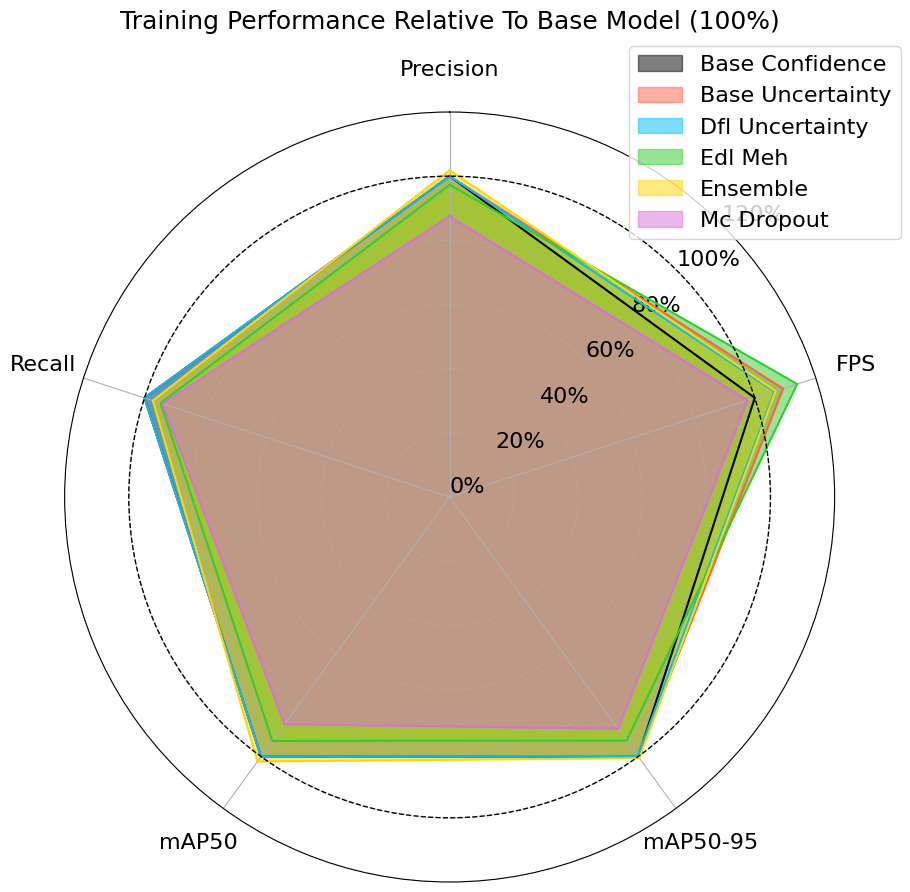

,Precision,Recall,mAP50,mAP50-95,FPS
name,,,,,
Base Confidence,1.000000,1.000000,1.000000,1.000000,1.000000
Base Uncertainty,1.000000,1.000000,1.000000,1.000000,1.038170
Dfl Uncertainty,1.000000,1.000000,1.000000,1.000000,0.983914
Edl Meh,0.960985,1.002498,0.972921,0.940320,0.971699
Ensemble,1.079528,0.952986,0.988247,0.960801,0.883809
Mc Dropout,0.903668,0.943630,0.944501,0.941788,0.806626


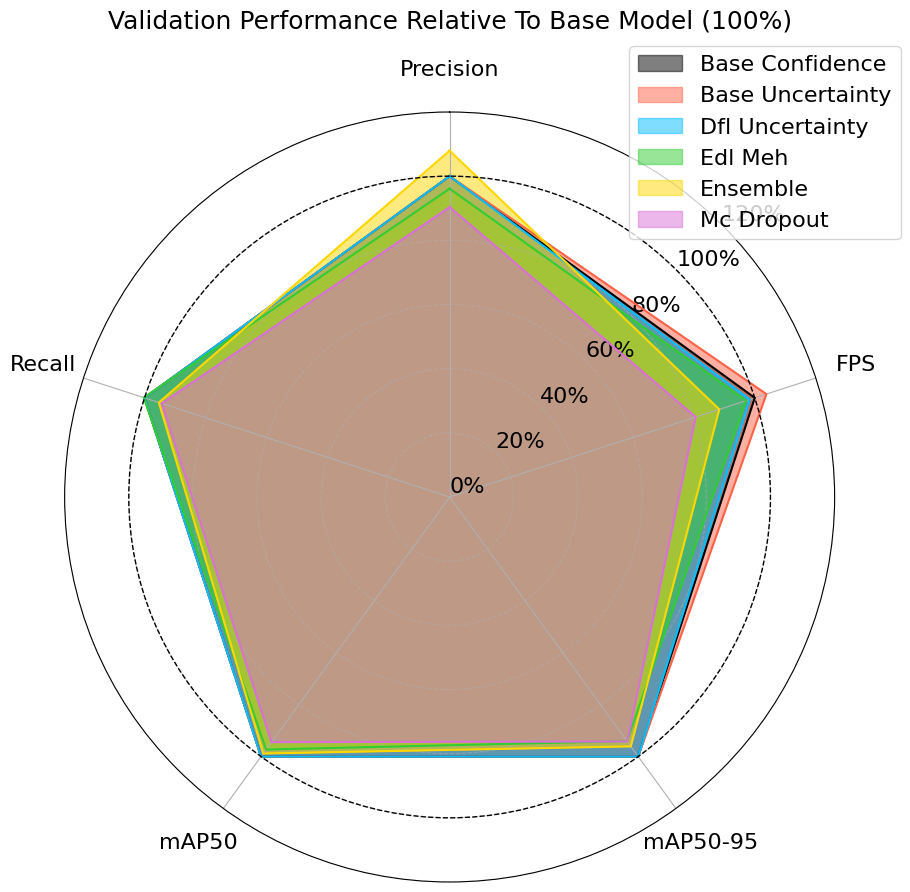

In [14]:
rename_dict_index = {k: v for k, v in zip(df_results_train.index.values, names_title_case)}

rename_dict_cols = {
    'metrics/precision(B)' : 'Precision',
    'metrics/recall(B)' : 'Recall',
    'metrics/mAP50(B)' : 'mAP50',
    'metrics/mAP50-95(B)' : 'mAP50-95',
    'speed_total' : 'FPS',
    #'metrics/mUE50' : 'mUE50', # mUE implementation still work in progress, not yet ready for use
    #'metrics/mUE50-95' : 'mUE50-95',
}

color_list = ['k', 'tomato', 'deepskyblue', 'limegreen', 'gold', 'orchid', 'lightcoral', 'lightseagreen']
colors = {idx: color for idx, color in zip(names_title_case, color_list[:len(names_title_case)])}

for path, df_selected in zip([train_path, val_path], [df_results_train, df_results_val]):

    df = df_selected[rename_dict_cols.keys()]
    # take inverse of inference time as fps
    df.loc[:, 'speed_total'] = 1 / df['speed_total']
    # take base index, and normalize all values to it
    df = df / df.iloc[0]

    df.rename(index=rename_dict_index, inplace=True)
    df.rename(columns=rename_dict_cols, inplace=True)


    display(df)

    categories = list(df.columns)
    num_vars = len(categories)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Repeat the first angle to close the plot

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    for idx in df.index:
        values = df.loc[idx].tolist()
        values += values[:1]  # Repeat the first value to close the plot
        ax.fill(angles, values, alpha=0.50, color=colors[idx], label=idx)
        ax.plot(angles, values, color=colors[idx])

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    ylim = round(max(df.max()), 1) + 0.1
    ax.set_ylim(0, ylim)

    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    ax.tick_params(axis='x', pad=20)
    ax.set_yticks(np.arange(0, ylim, 0.2))
    ax.set_yticklabels(ax.get_yticks(), rotation=45)

    ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
    ax.set_theta_offset(np.pi / 2)

    ax.yaxis.grid(True, linestyle='--', alpha=0.5)
    ax.axhline(1, color='black', linewidth=1, linestyle='--')
    ax.set_rlabel_position(-45)
    ax.set_title(f"{'Training' if 'train' in path else 'Validation'} Performance relative to base model (100%)".title(), pad=60)
    ax.title.set_position([.5, 1.4])

    plt.savefig(f'{path}/radar_chart.png', bbox_inches='tight', dpi=600)
    plt.savefig(f'{path}/radar_chart.pdf', bbox_inches='tight')
    plt.show()